<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Customizing Plot Legends](04.06-Customizing-Legends.ipynb) | [Contents](Index.ipynb) | [Multiple Subplots](04.08-Multiple-Subplots.ipynb) >

# Customizing Colorbars

In [2]:
import matplotlib.pyplot as plt

Plot legends identify discrete labels of discrete points.
For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.
In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot.
Because the book is printed in black-and-white, this section has an accompanying online supplement where you can view the figures in full color (https://github.com/jakevdp/PythonDataScienceHandbook).
We'll start by setting up the notebook for plotting and importing the functions we will use:

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [5]:
%matplotlib inline
import numpy as np

As we have seen several times throughout this section, the simplest colorbar can be created with the ``plt.colorbar`` function:

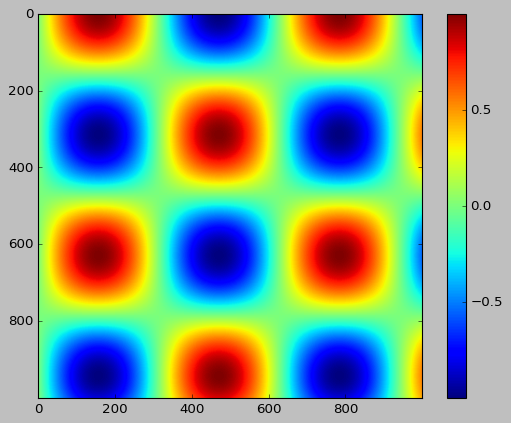

In [6]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();# 색상 막대 

In [7]:
I.shape

(1000, 1000)

We'll now discuss a few ideas for customizing these colorbars and using them effectively in various situations.

## Customizing Colorbars

The colormap can be specified using the ``cmap`` argument to the plotting function that is creating the visualization:

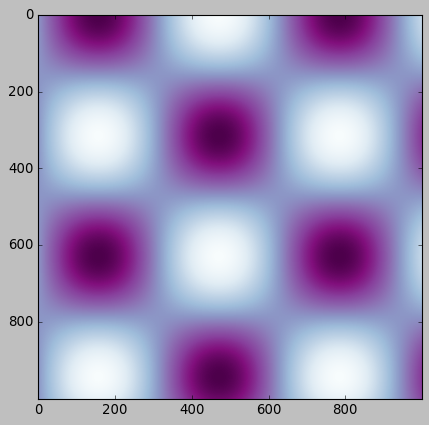

In [11]:
plt.imshow(I, cmap='BuPu');

In [9]:
help(plt.cm)

Help on module matplotlib.cm in matplotlib:

NAME
    matplotlib.cm - Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin.

DESCRIPTION
    .. seealso::

      :doc:`/gallery/color/colormap_reference` for a list of builtin colormaps.

      :ref:`colormap-manipulation` for examples of how to make
      colormaps.

      :ref:`colormaps` an in-depth discussion of choosing
      colormaps.

      :ref:`colormapnorms` for more details about data normalization.

CLASSES
    builtins.object
        ScalarMappable
    collections.abc.Mapping(collections.abc.Collection)
        ColormapRegistry

    class ColormapRegistry(collections.abc.Mapping)
     |  ColormapRegistry(cmaps)
     |
     |  Container for colormaps that are known to Matplotlib by name.
     |
     |  The universal registry instance is `matplotlib.colormaps`. There should be
     |  no need for users to instantiate `.ColormapRegistry` themselves.
     |
     |  Read access uses a dict-like interface

In [10]:
print(dir(plt.cm))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'ColormapRegistry', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'Mapping', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'ScalarMappable', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', '_LUTSIZE', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_api', '_auto_norm_from_scale', '_colormaps', '_ensure_cmap', '_gen_cmap_r

All the available colormaps are in the ``plt.cm`` namespace; using IPython's tab-completion will give you a full list of built-in possibilities:
```
plt.cm.<TAB>
```
But being *able* to choose a colormap is just the first step: more important is how to *decide* among the possibilities!
The choice turns out to be much more subtle than you might initially expect.

### Choosing the Colormap

A full treatment of color choice within visualization is beyond the scope of this book, but for entertaining reading on this subject and others, see the article ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).
Matplotlib's online documentation also has an [interesting discussion](http://Matplotlib.org/1.4.1/users/colormaps.html) of colormap choice.

Broadly, you should be aware of three different categories of colormaps:

- *Sequential colormaps*: These are made up of one continuous sequence of colors (e.g., ``binary`` or ``viridis``).
- *Divergent colormaps*: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., ``RdBu`` or ``PuOr``).
- *Qualitative colormaps*: these mix colors with no particular sequence (e.g., ``rainbow`` or ``jet``).

The ``jet`` colormap, which was the default in Matplotlib prior to version 2.0, is an example of a qualitative colormap.
Its status as the default was quite unfortunate, because qualitative maps are often a poor choice for representing quantitative data.
Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

We can see this by converting the ``jet`` colorbar into black and white:

In [13]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """주어진 색상 지도의 회색조 버전을 반환함"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # RGBA를 지각 가능한 회색조 밝기로 전환
    # 비교: http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """색상지도를 그에 상응하는 회색조 버전과 함께 플로팅"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39076\3060793481.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39076\3060793481.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


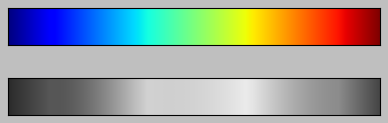

In [14]:
view_colormap('jet')

Notice the bright stripes in the grayscale image.
Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset.
It's better to use a colormap such as ``viridis`` (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range.
Thus it not only plays well with our color perception, but also will translate well to grayscale printing:

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39076\3060793481.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39076\3060793481.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


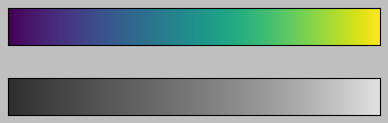

In [15]:
view_colormap('viridis')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39076\3060793481.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39076\3060793481.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


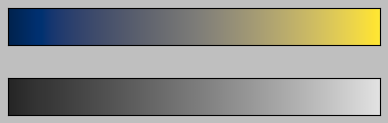

In [16]:
view_colormap('cividis')

If you favor rainbow schemes, another good option for continuous data is the ``cubehelix`` colormap:

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39076\3060793481.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39076\3060793481.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


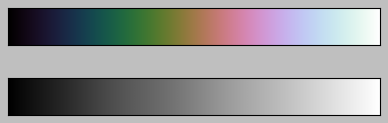

In [17]:
view_colormap('cubehelix')

For other situations, such as showing positive and negative deviations from some mean, dual-color colorbars such as ``RdBu`` (*Red-Blue*) can be useful. However, as you can see in the following figure, it's important to note that the positive-negative information will be lost upon translation to grayscale!

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39076\3060793481.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39076\3060793481.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


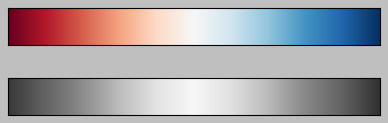

In [18]:
view_colormap('RdBu')

We'll see examples of using some of these color maps as we continue.

There are a large number of colormaps available in Matplotlib; to see a list of them, you can use IPython to explore the ``plt.cm`` submodule. For a more principled approach to colors in Python, you can refer to the tools and documentation within the Seaborn library (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).

### Color limits and extensions

Matplotlib allows for a large range of colorbar customization.
The colorbar itself is simply an instance of ``plt.Axes``, so all of the axes and tick formatting tricks we've learned are applicable.
The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the ``extend`` property.
This might come in handy, for example, if displaying an image that is subject to noise:

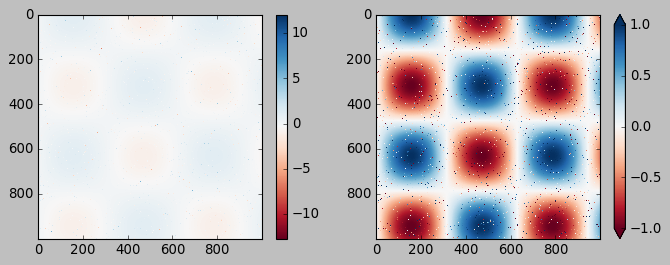

In [20]:
# 이미지 픽셀의 1%의 노이즈 생성
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in.
In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits.
The result is a much more useful visualization of our data.

### Discrete Color Bars

Colormaps are by default continuous, but sometimes you'd like to represent discrete values.
The easiest way to do this is to use the ``plt.cm.get_cmap()`` function, and pass the name of a suitable colormap along with the number of desired bins:

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39076\3816665918.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 20))


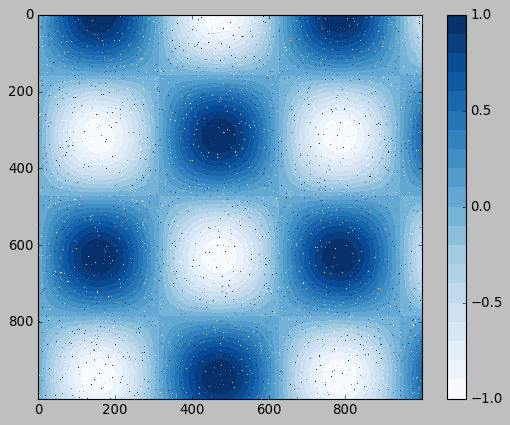

In [23]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 20))
plt.colorbar()
plt.clim(-1, 1);

The discrete version of a colormap can be used just like any other colormap.

## Example: Handwritten Digits

For an example of where this might be useful, let's look at an interesting **visualization of some hand written digits data.**
This data is included in Scikit-Learn, and consists of nearly<u> 2,000 $8 \times 8$ thumbnails showing various hand-written digits.</u>

For now, let's start by downloading the digits data and visualizing several of the example images with ``plt.imshow()``:

- "thumbnails"는 보통 **이미지, 비디오, 문서 등을 작게 축소한 미리 보기(preview)**를 의미

- sklearn.datasets 모듈의 digits 데이터셋은 숫자 필기체 이미지 데이터를 포함하고 있는 샘플 데이터셋
- 머신러닝 학습 및 실습에 자주 사용

1. 데이터셋 개요
1) 목적: 숫자 인식 문제를 위한 이미지 분류 실습.
2) 데이터 형식:
총 1,797개의 샘플.
각 샘플은 8×8 픽셀 크기의 그레이스케일 이미지(64개의 픽셀)로 이루어짐.
각 샘플은 0~9 사이의 숫자를 나타냄.
3) 레이블: 각 이미지에 해당하는 숫자(0~9).


In [2]:
from sklearn.datasets import load_digits

# 데이터 로드
digits = load_digits()
print(type(digits))
# 데이터 확인
print(digits.keys())


<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


- data:
이미지 데이터를 1차원 벡터로 펼친 값.
크기: (n_samples, 64) (즉, 샘플 수 × 픽셀 수).
각 값은 0~16 사이로, 픽셀의 밝기를 나타냄.

- target:
이미지에 해당하는 숫자 레이블 (0~9).
크기: (n_samples,).

- images: 
8×8 크기의 원래 이미지 데이터를 포함.
크기: (n_samples, 8, 8).

- DESCR:
데이터셋에 대한 설명 문자열.

In [3]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

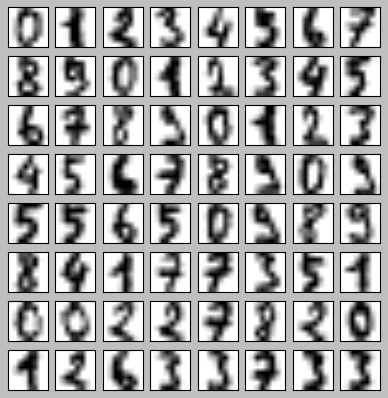

In [4]:
# 0 ~ 5 까지 숫자의 이미지를 적재하고 이 중 몇 가지를 시각화
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)# 교재는 6

fig, ax = plt.subplots(8, 8, figsize=(6,6))
for i, axi in enumerate(ax.flat):# (8,8) > 64개로 평탄화
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [8]:
type(digits)

sklearn.utils._bunch.Bunch

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
digits.data.shape # 다차원 

(1797, 64)

Because each **digit is defined by the hue of its 64 pixels, we can consider each digit to be a point lying in 64-dimensional space: each dimension represents the brightness of one pixel.**
But visualizing relationships in such high-dimensional spaces can be extremely difficult.
One way to approach this is to <u>use a *dimensionality reduction* technique such as manifold learning to reduce the dimensionality of the data while maintaining the relationships of interest.</u>
**Dimensionality reduction is an example of unsupervised machine learning,** and we will discuss it in more detail in [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb).

Deferring the discussion of these details, let's take a look at a two-dimensional manifold learning projection of this digits data (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb) for details):

구글링: 매니폴드(manifold)란 뭘까?, 작성자 잘먹잘살, 2018.12.12, https://blog.naver.com/coniecual/221417921857

manifold 단어 뜻 (어원 & 일반 의미)
- 영어 뜻: manifold = "많은", "다양한"

- 고대 영어 manigfeald → many + fold(겹, 면)

- 즉, 다양한 방향이나 구조를 가진 복잡한 공간이라는 의미

매니폴드란 ? 수학적 정의
- 국소적으로(=작게 보면) 평면(유클리드 공간)처럼 보이는 공간  (## 축구공도 2차원으로 보면 원모양)
- 전체적으로는 휘거나 복잡할 수 있지만, 작게 확대하면 평평해 보이는 구조
- 원 > 1차원 매니폴드는 직선
-구면체 > 2차원 매니폴드 평면

- 머신러닝, 데이터 분석에서는?
 > 고차원 데이터가 사실은 낮은 차원의 매니폴드 위에 존재한다는 가정
 - t-SNE, UMAP, Isomap, LLE → 전부 매니폴드 학습(manifold learning) 기법

In [5]:
# IsoMap을 사용하여 숫자를 2차원에 사영
from sklearn.manifold import Isomap
iso = Isomap(n_components=2) # iso: 같다, map: mapping > projection >>2차원 거리 관계를 보존하면서 변환
projection = iso.fit_transform(digits.data) # 이미지의 2차원 배열 > 다차원 -> 2차원으로 차원 축소
# 다차원의 A,B,C 점의 거리를 유지한 채로 2차원에 A,B,C간의 거리를 보존 유지(거리만 유지하고 좌표는 달라짐)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


We'll use our discrete colormap to view the results, setting the ``ticks`` and ``clim`` to improve the aesthetics of the resulting colorbar:

C:\Users\user\AppData\Local\Temp\ipykernel_17920\4260165882.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 10))


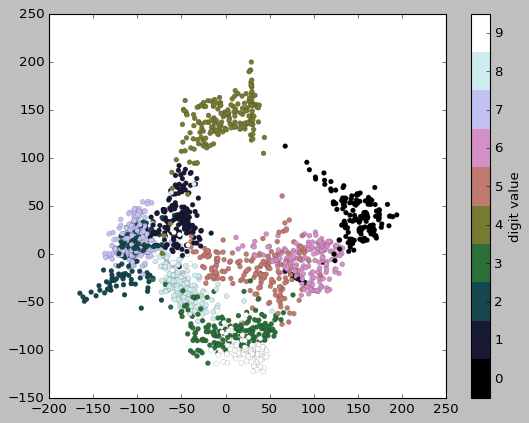

In [ ]:
# 결과 플롯 그리기
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 10))
plt.colorbar(ticks=range(10), label='digit value')
plt.clim(-0.5, 9.5)

**The projection also gives us some interesting insights on the relationships within the dataset**: for example, the ranges of 5 and 3 nearly overlap in this projection, indicating that some hand written fives and threes are difficult to distinguish, and therefore more likely to be confused by an automated classification algorithm.
Other values, like 0 and 1, are more distantly separated, and therefore much less likely to be confused.
This observation agrees with our intuition, because 5 and 3 look much more similar than do 0 and 1.

We'll return to manifold learning and to digit classification in [Chapter 5](05.00-Machine-Learning.ipynb).

<!--NAVIGATION-->
< [Customizing Plot Legends](04.06-Customizing-Legends.ipynb) | [Contents](Index.ipynb) | [Multiple Subplots](04.08-Multiple-Subplots.ipynb) >